In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

Read data

In [58]:
df = pd.DataFrame(columns=["distance", "size", "valid", "time", "success", "condition"])
path = "./results"
for (root, dir, files) in os.walk(path):
    for fname in files:
        if fname.endswith(".csv"):
            condition = fname[2:-4]
            print(condition)
            with open(f"{path}/{fname}", "r") as f:
                new_data = pd.read_csv(f, index_col=0)
                new_data["condition"] = condition
                df = pd.concat((df, new_data))
df

mouse
mouse_latency
pose
touchpad
mouse
mouse_latency
pose
touchpad
mouse
mouse_latency
pose
touchpad
mouse
mouse_latency
pose
touchpad
mouse
mouse_latency
pose
touchpad


,distance,size,valid,time,success,condition
0,200,30,True,0.664888,True,mouse
1,200,30,True,0.568198,True,mouse
2,200,30,True,0.631911,True,mouse
3,200,30,True,0.584164,True,mouse
4,200,30,True,0.615198,True,mouse
...,...,...,...,...,...,...
292,300,50,True,1.049852,True,touchpad
293,300,50,True,1.215523,True,touchpad
294,300,50,True,1.105559,True,touchpad
295,300,50,True,1.330810,True,touchpad


Preprocess data

In [59]:
df = df[df["valid"] == True]
df = df[df["success"] == True]
df = df.dropna()

In [60]:
def index_of_difficulty(size, distance):
    division = (2 * distance) / size
    return math.log(division, 2)

In [61]:
df['ID'] = df.apply(lambda row: index_of_difficulty(row['size'],row['distance']),axis=1)

In [62]:
conditions = df["condition"].unique()
data_by_conditions = {}
for cond in conditions:
    data_by_conditions[cond] = df[df["condition"] == cond]

In [87]:
# palette for visualization

palette_conditions={
    "mouse":"#ff8a3e44",
    "mouse_latency":"#fff49844",
    "touchpad":"#99e26944",
    "pose":"#8dcde244"
}

mouse
mouse_latency
pose
touchpad


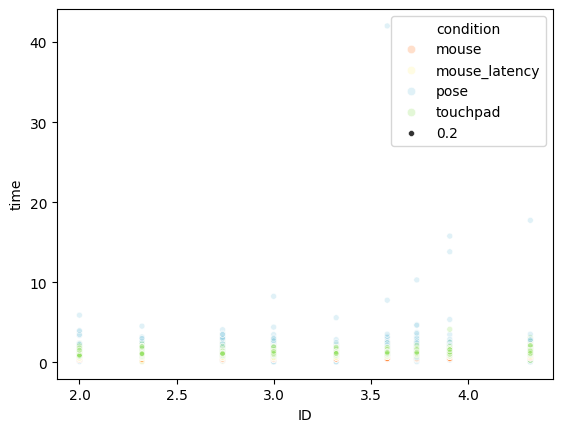

In [88]:
results = {}
for i,cond in enumerate(conditions):
    df_cond = data_by_conditions[cond]
    x = np.array(df_cond["ID"]).reshape(-1,1)
    y = df_cond["time"]
    res = LinearRegression().fit(x,y)
    print(cond)
    b = res.coef_[0]
    a = res.intercept_
    results[cond] = (a,b)
sns.scatterplot(df, x="ID", y="time", hue="condition", palette=palette_conditions,size=0.2)
plt.draw()

<Axes: xlabel='x', ylabel='y'>

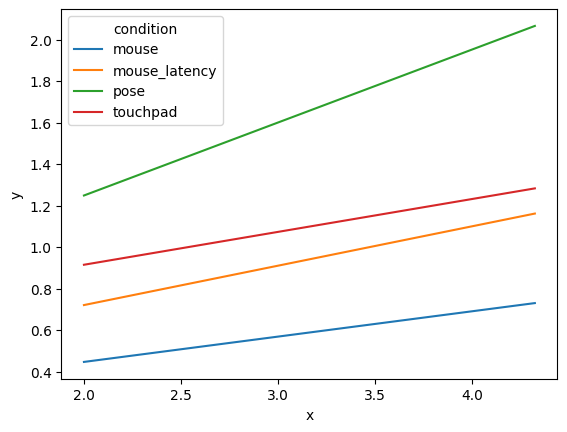

In [98]:
df_lines = pd.DataFrame(columns=["x","y","condition"])
for cond in conditions:
    a, b = results[cond]
    print(f"Fitt's Law parameters for condition {cond}: a={a}; b={b}")
    df_new = pd.DataFrame(columns=["x","y","condition"])

    x = np.linspace(df["ID"].min(), df["ID"].max(),100)
    y = a + b * x
    df_new["x"] = x
    df_new["y"] = y
    df_new["condition"] = cond
    df_lines = pd.concat((df_lines, df_new))

sns.lineplot(data=df_lines,x="x",y="y",hue="condition")